In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import where as wh
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [147]:
claims = pd.read_csv("claims.csv")
demog = pd.read_csv("cust_demographics.csv")

In [148]:
claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [149]:
demog.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [150]:
df = pd.merge(left=demog, right=claims, left_on="CUST_ID", right_on="customer_id", how="outer")

df.drop(columns= ["customer_id"], inplace=True)

df.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,154557.0,Female,23-May-78,DE,962-879-1238,Platinum,69348631.0,Driver error,04/10/2018,Auto,No,Injury only,NaN,1.0,Yes
1,263204.0,Male,20-Dec-72,TX,173-892-6314,Silver,40953049.0,Other causes,04/04/2018,Auto,No,Material and injury,$39192,1.0,Yes
2,287476.0,Male,28-Jul-88,FL,364-598-1549,Silver,45780237.0,Natural causes,10/17/2017,Auto,Unknown,Material only,$1621.5,2.0,Yes
3,441097.0,Male,19-Aug-71,CA,187-348-8375,Gold,89833962.0,Other causes,03/21/2018,Auto,Yes,Material and injury,$37040,1.0,No
4,524545.0,Female,10-Aug-80,NC,798-862-5398,Gold,35782742.0,Other driver error,07/27/2018,Auto,No,Injury only,$35250,3.0,No


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUST_ID              1092 non-null   float64
 1   gender               1092 non-null   object 
 2   DateOfBirth          1092 non-null   object 
 3   State                1092 non-null   object 
 4   Contact              1092 non-null   object 
 5   Segment              1092 non-null   object 
 6   claim_id             1100 non-null   float64
 7   incident_cause       1100 non-null   object 
 8   claim_date           1100 non-null   object 
 9   claim_area           1100 non-null   object 
 10  police_report        1100 non-null   object 
 11  claim_type           1100 non-null   object 
 12  claim_amount         1035 non-null   object 
 13  total_policy_claims  1090 non-null   float64
 14  fraudulent           1100 non-null   object 
dtypes: float64(3), object(12)
memory usage

2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [152]:
df["DateOfBirth"] = pd.to_datetime(df.DateOfBirth, format="%d-%b-%y")

df.loc[(df.DateOfBirth.dt.year > 2000), "DateOfBirth"] = df[df.DateOfBirth.dt.year > 2020]["DateOfBirth"].apply(lambda x: x - pd.DateOffset(years=100))

df["claim_date"] = pd.to_datetime(df.claim_date, format="%m/%d/%Y")

df["Contact"] = pd.to_numeric(df.Contact.str.replace("-", ""), downcast="float")

df.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,154557.0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,No,Injury only,NaN,1.0,Yes
1,263204.0,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,$39192,1.0,Yes
2,287476.0,Male,1988-07-28,FL,3.645982e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Unknown,Material only,$1621.5,2.0,Yes
3,441097.0,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Yes,Material and injury,$37040,1.0,No
4,524545.0,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,No,Injury only,$35250,3.0,No


3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [153]:
df["claim_amount"] = pd.to_numeric(df.claim_amount.str.replace("$", ""), downcast="float")
df.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,154557.0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,No,Injury only,NaN,1.0,Yes
1,263204.0,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.0,1.0,Yes
2,287476.0,Male,1988-07-28,FL,3.645982e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.5,2.0,Yes
3,441097.0,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.0,1.0,No
4,524545.0,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,No,Injury only,35250.0,3.0,No


In [154]:
df.dtypes

CUST_ID                       float64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                       float64
Segment                        object
claim_id                      float64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float32
total_policy_claims           float64
fraudulent                     object
dtype: object

4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims

In [155]:
df["flag"] = wh(df.police_report == "No", 0, wh(df.police_report == "Yes", 1, np.nan))
df.drop(columns=["police_report"], inplace=True)
df.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,154557.0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,Injury only,NaN,1.0,Yes,0.0
1,263204.0,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,Material and injury,39192.0,1.0,Yes,0.0
2,287476.0,Male,1988-07-28,FL,3.645982e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Material only,1621.5,2.0,Yes,NaN
3,441097.0,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Material and injury,37040.0,1.0,No,1.0
4,524545.0,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,Injury only,35250.0,3.0,No,0.0


5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique.
Retain the most recent observation and delete any duplicated records in the data based on the customer ID column. 

In [156]:
df = df.groupby("CUST_ID").first().reset_index(drop=True)
df.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,Injury only,NaN,1.0,Yes,0.0
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,Material and injury,39192.0,1.0,Yes,0.0
2,Male,1988-07-28,FL,3.645982e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Material only,1621.5,2.0,Yes,NaN
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Material and injury,37040.0,1.0,No,1.0
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,Injury only,35250.0,3.0,No,0.0


6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)


In [157]:
df.isnull().sum()

gender                   0
DateOfBirth              0
State                    0
Contact                  0
Segment                  0
claim_id                 7
incident_cause           7
claim_date               7
claim_area               7
claim_type               7
claim_amount            72
total_policy_claims     17
fraudulent               7
flag                   299
dtype: int64

In [158]:
categ = ["gender","State","Segment","incident_cause","claim_area","claim_type","fraudulent","flag"]
conti = ["claim_amount"]

In [159]:
for col in categ:
  df[col] = df[col].fillna(df[col].mode()[0])
df[conti] = df[conti].fillna(df[conti].mean())
df.head()  

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,Injury only,12470.498047,1.0,Yes,0.0
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,Material and injury,39192.000000,1.0,Yes,0.0
2,Male,1988-07-28,FL,3.645982e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Material only,1621.500000,2.0,Yes,0.0
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Material and injury,37040.000000,1.0,No,1.0
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,Injury only,35250.000000,3.0,No,0.0


In [160]:
df.isnull().sum()

gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                7
incident_cause          0
claim_date              7
claim_area              0
claim_type              0
claim_amount            0
total_policy_claims    17
fraudulent              0
flag                    0
dtype: int64

7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria

Children < 18

Youth 18-30

Adult 30-60

Senior > 60

In [161]:
df["Age"] = round((df.claim_date - df.DateOfBirth).apply(lambda x: x.days) / 365.25, 0)
df.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,Injury only,12470.498047,1.0,Yes,0.0,40.0
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,Material and injury,39192.000000,1.0,Yes,0.0,45.0
2,Male,1988-07-28,FL,3.645982e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Material only,1621.500000,2.0,Yes,0.0,29.0
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Material and injury,37040.000000,1.0,No,1.0,47.0
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,Injury only,35250.000000,3.0,No,0.0,38.0


In [162]:
df["Age_Grp"] = wh(df.Age < 18, "Children", wh(df.Age < 30, "Youth", wh(df.Age < 60, "Adult", wh(df.Age < 100, "Senior", "NAN"))))
df["Age_Grp"] = df["Age_Grp"].fillna(df["Age_Grp"].mode())
df.groupby(by = "Age_Grp").count()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age
Age_Grp,,,,,,,,,,,,,,,
Adult,758,758,758,758,758,758,758,758,758,758,758,750,758,758,758
Children,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
NAN,7,7,7,7,7,0,7,0,7,7,7,0,7,7,0
Youth,318,318,318,318,318,318,318,318,318,318,318,316,318,318,318


8. What is the average amount claimed by the customers from various segments?


In [163]:
df.groupby(by = "Segment")[["claim_amount"]].mean()

,claim_amount
Segment,
Gold,12755.710938
Platinum,12370.138672
Silver,12271.163086


9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [164]:
df.loc[df.claim_date < "2018-09-10", :].groupby("incident_cause")["claim_amount"].sum().add_prefix("total_")

incident_cause
total_Crime                  724462.5
total_Driver error          3264286.0
total_Natural causes        1312706.0
total_Other causes          3725038.5
total_Other driver error    3318806.5
Name: claim_amount, dtype: float32

10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [165]:
df.loc[(df.incident_cause.str.lower().str.contains("driver") & ((df.State == "TX") | (df.State == "DE") | (df.State == "AK"))), :].groupby(by = "State")["State"].count()

State
AK    10
DE    15
TX    10
Name: State, dtype: int64

11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart

In [166]:
gen_seg = df.groupby(by = ["gender", "Segment"])["claim_amount"].sum().reset_index()
gen_seg

,gender,Segment,claim_amount
0,Female,Gold,2122234.0
1,Female,Platinum,2381974.0
2,Female,Silver,1935970.0
3,Male,Gold,2622890.5
4,Male,Platinum,2120756.5
5,Male,Silver,2346666.0


In [167]:
gen_seg = gen_seg.pivot(index = "Segment", columns = "gender", values = "claim_amount")
gen_seg

gender,Female,Male
Segment,,
Gold,2122234.0,2622890.5
Platinum,2381974.0,2120756.5
Silver,1935970.0,2346666.0


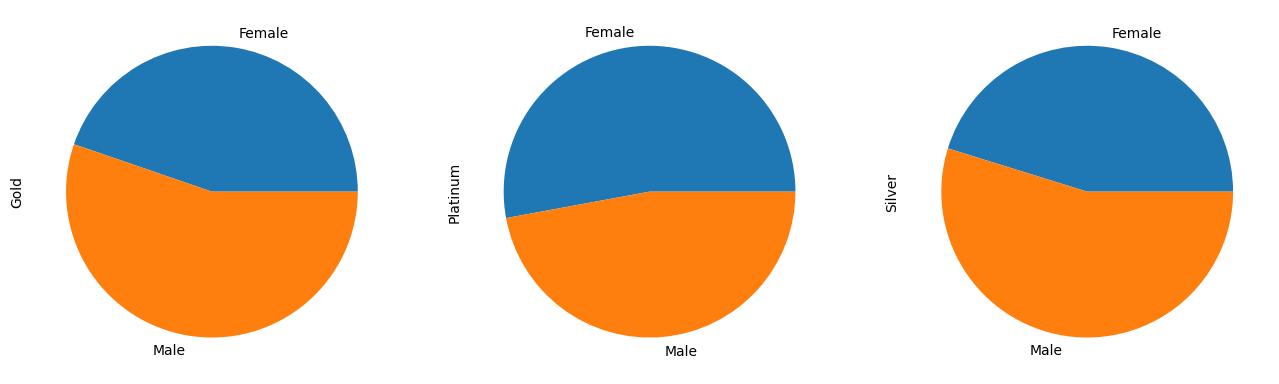

In [168]:
gen_seg.T.plot(kind="pie", subplots=True, legend=False, figsize=(16,6))
plt.show()

12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [169]:
gen = df.loc[(df.incident_cause.str.lower().str.contains("driver"))].groupby(by = "gender")[["gender"]].count().add_prefix("CountOf_").reset_index()
gen

,gender,CountOf_gender
0,Female,221
1,Male,280


C:\Users\siddh\AppData\Local\Temp\ipykernel_18480\3273432544.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gen, x="gender", y="CountOf_gender", palette=["silver", "gold"])


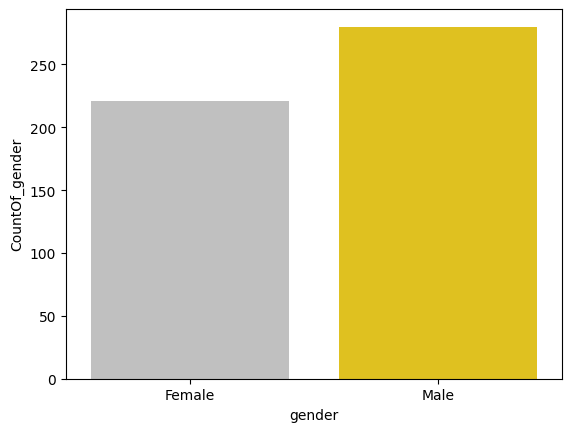

In [170]:
sns.barplot(data=gen, x="gender", y="CountOf_gender", palette=["silver", "gold"])
plt.show()

13. Which age group had the maximum fraudulent policy claims? Visualizeit on a bar chart.

In [171]:
fraud = df.groupby(by = "Age_Grp")[["fraudulent"]].count().reset_index()
fraud

,Age_Grp,fraudulent
0,Adult,758
1,Children,2
2,NAN,7
3,Youth,318


C:\Users\siddh\AppData\Local\Temp\ipykernel_18480\1495830879.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud, x="Age_Grp", y="fraudulent", palette=["orange", "red"])
C:\Users\siddh\AppData\Local\Temp\ipykernel_18480\1495830879.py:1: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=fraud, x="Age_Grp", y="fraudulent", palette=["orange", "red"])


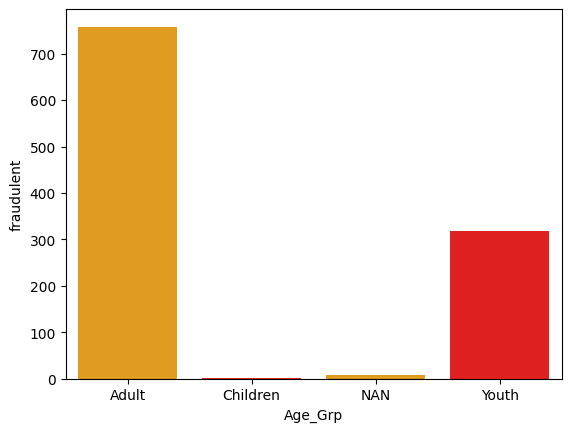

In [172]:
sns.barplot(data=fraud, x="Age_Grp", y="fraudulent", palette=["orange", "red"])
plt.show()

14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order

In [173]:
df.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,Age_Grp
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,Injury only,12470.498047,1.0,Yes,0.0,40.0,Adult
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,Material and injury,39192.000000,1.0,Yes,0.0,45.0,Adult
2,Male,1988-07-28,FL,3.645982e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Material only,1621.500000,2.0,Yes,0.0,29.0,Youth
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Material and injury,37040.000000,1.0,No,1.0,47.0,Adult
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,Injury only,35250.000000,3.0,No,0.0,38.0,Adult


In [174]:
monthly_trend = df.groupby(["claim_date"])[["claim_amount"]].sum().reset_index()

In [175]:
monthly_trend['Monthly'] = monthly_trend['claim_date'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
monthly_trend['Yearly'] = monthly_trend['claim_date'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [176]:
data = monthly_trend.groupby(["Monthly"])[["claim_amount"]].sum().reset_index()
data

,Monthly,claim_amount
0,April,1276071.5
1,August,911203.5
2,December,696701.5
3,February,1133107.0
4,January,1332012.0
5,July,1379035.0
6,June,1276333.0
7,March,1320094.0
8,May,1114211.5
9,November,601125.0


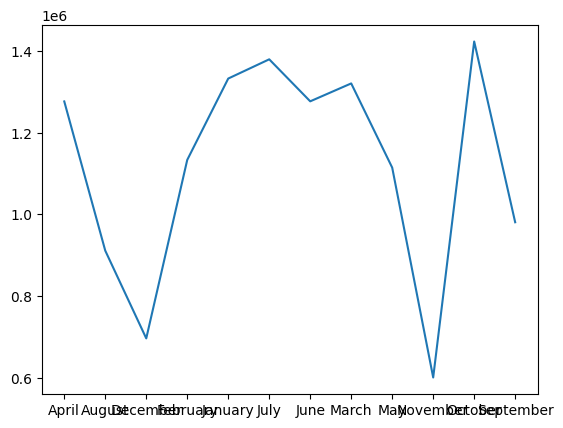

In [177]:
plt.plot(data["Monthly"], data["claim_amount"], label="Trend Line")
plt.show()

15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [178]:
avg_claim = df.groupby(["gender", "Age_Grp", "fraudulent"])[["claim_amount"]].mean().reset_index()
avg_claim

,gender,Age_Grp,fraudulent,claim_amount
0,Female,Adult,No,12409.596680
1,Female,Adult,Yes,12348.010742
2,Female,Children,No,20200.000000
3,Female,NAN,No,12470.498047
4,Female,Youth,No,12398.187500
5,Female,Youth,Yes,7756.771484
6,Male,Adult,No,12150.460938
7,Male,Adult,Yes,17062.199219
8,Male,Children,No,24610.000000
9,Male,NAN,No,12470.498047


In [179]:
avg_claim_male = avg_claim.loc[avg_claim.gender == "Male", ["claim_amount", "Age_Grp", "fraudulent"]]
avg_claim_female = avg_claim.loc[avg_claim.gender == "Female", ["claim_amount", "Age_Grp", "fraudulent"]]

In [180]:
avg_claim_male

,claim_amount,Age_Grp,fraudulent
6,12150.460938,Adult,No
7,17062.199219,Adult,Yes
8,24610.000000,Children,No
9,12470.498047,NAN,No
10,12199.076172,Youth,No
11,10683.552734,Youth,Yes


In [181]:
avg_claim_female

,claim_amount,Age_Grp,fraudulent
0,12409.596680,Adult,No
1,12348.010742,Adult,Yes
2,20200.000000,Children,No
3,12470.498047,NAN,No
4,12398.187500,Youth,No
5,7756.771484,Youth,Yes


In [182]:
male_fraudulent = avg_claim_male.loc[avg_claim.fraudulent == "Yes", ["claim_amount", "Age_Grp"]]
male_non_fraudulent = avg_claim_male.loc[avg_claim.fraudulent == "No", ["claim_amount", "Age_Grp"]]
female_fraudulent = avg_claim_female.loc[avg_claim.fraudulent == "Yes", ["claim_amount", "Age_Grp"]]
female_non_fraudulent = avg_claim_female.loc[avg_claim.fraudulent == "No", ["claim_amount", "Age_Grp"]]

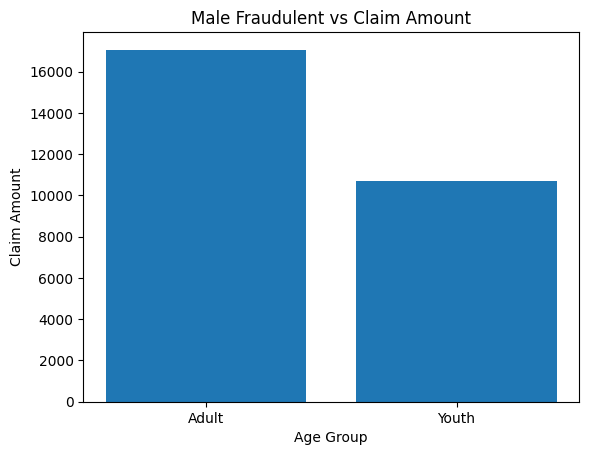

In [183]:
plt.bar(male_fraudulent.Age_Grp, male_fraudulent.claim_amount)
plt.title("Male Fraudulent vs Claim Amount")
plt.xlabel("Age Group")
plt.ylabel("Claim Amount")
plt.show()

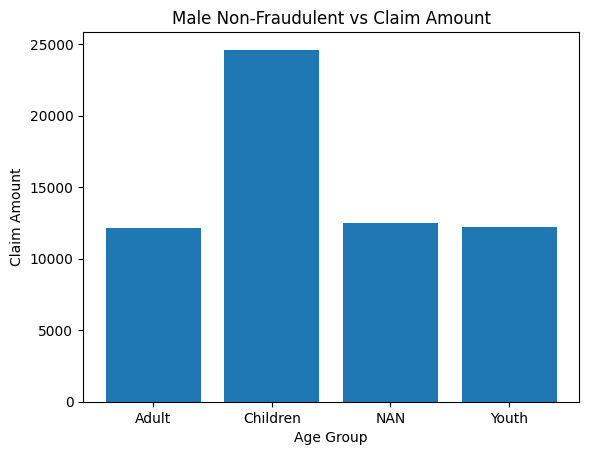

In [184]:
plt.bar(male_non_fraudulent.Age_Grp, male_non_fraudulent.claim_amount)
plt.title("Male Non-Fraudulent vs Claim Amount")
plt.xlabel("Age Group")
plt.ylabel("Claim Amount")
plt.show()

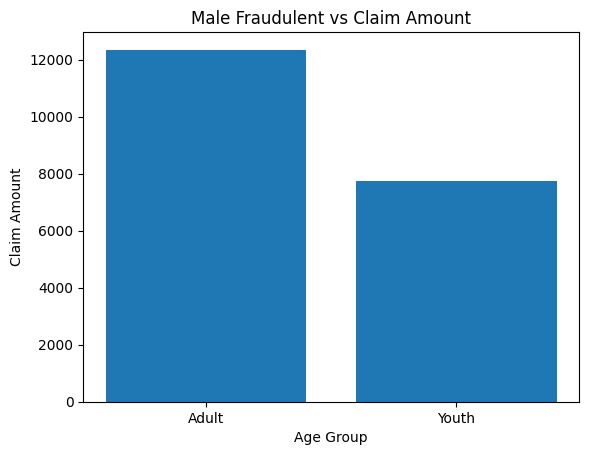

In [185]:
plt.bar(female_fraudulent.Age_Grp, female_fraudulent.claim_amount)
plt.title("Male Fraudulent vs Claim Amount")
plt.xlabel("Age Group")
plt.ylabel("Claim Amount")
plt.show()

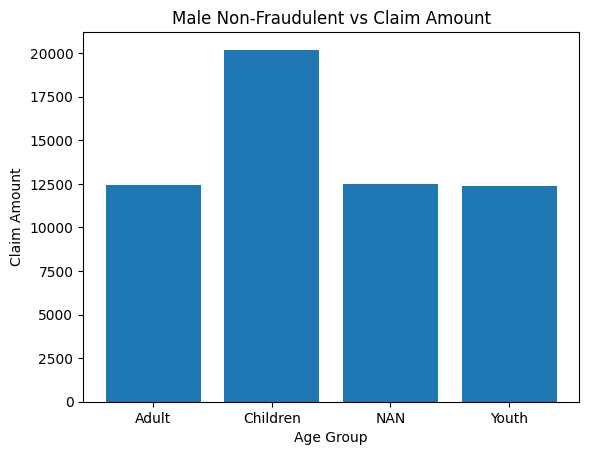

In [186]:
plt.bar(female_non_fraudulent.Age_Grp, female_non_fraudulent.claim_amount)
plt.title("Male Non-Fraudulent vs Claim Amount")
plt.xlabel("Age Group")
plt.ylabel("Claim Amount")
plt.show()

Based on the conclusions from exploratory analysis as well as suitable
statistical tests, answer the below questions. Please include a detailed
write-up on the parameters taken into consideration, the Hypothesis
testing steps, conclusion from the p-values and the business implications of
the statements.

16. Is there any similarity in the amount claimed by males and females?

Let's say:

HO(Null Hypothesis) -> No similarity in the amount claimed by males and females

Ha(Alternate Hypothesis) -> There is a similarity in the amount claimed by males and females

CI -> 95%

pvalue -> 0.05

In [187]:
df.gender.value_counts()

gender
Male      553
Female    532
Name: count, dtype: int64

In [188]:
df.columns

Index(['gender', 'DateOfBirth', 'State', 'Contact', 'Segment', 'claim_id',
       'incident_cause', 'claim_date', 'claim_area', 'claim_type',
       'claim_amount', 'total_policy_claims', 'fraudulent', 'flag', 'Age',
       'Age_Grp'],
      dtype='object')

In [189]:
df_Gender = df.groupby(["gender", "claim_date"])[["claim_amount"]].sum().reset_index()
df_Gender

,gender,claim_date,claim_amount
0,Female,2017-01-01,119620.000000
1,Female,2017-01-07,4576.500000
2,Female,2017-01-14,85203.000000
3,Female,2017-01-21,23379.498047
4,Female,2017-01-27,6507.500000
...,...,...,...
194,Male,2018-10-03,60291.000000
195,Male,2018-10-09,145030.000000
196,Male,2018-10-16,21610.000000
197,Male,2018-10-23,83410.500000


In [190]:
df_Gender["Monthly"] = df_Gender["claim_date"].apply(lambda x: pd.Timestamp.strftime(x, format="%B"))
df_Gender["Yearly"] = df_Gender["claim_date"].apply(lambda x: pd.Timestamp.strftime(x, format="%Y"))
df_Gender.head()

,gender,claim_date,claim_amount,Monthly,Yearly
0,Female,2017-01-01,119620.000000,January,2017
1,Female,2017-01-07,4576.500000,January,2017
2,Female,2017-01-14,85203.000000,January,2017
3,Female,2017-01-21,23379.498047,January,2017
4,Female,2017-01-27,6507.500000,January,2017


In [191]:
male_spend = df_Gender.loc[df_Gender.gender == "Male", "claim_amount"]
female_spend = df_Gender.loc[df_Gender.gender == "Female", "claim_amount"]

print(f"mean of male spend: {male_spend.mean()}, mean of female spend: {female_spend.mean()}")

mean of male spend: 71367.390625, mean of female spend: 63778.25390625


In [192]:
stats.ttest_ind(male_spend, female_spend)

TtestResult(statistic=1.3269766599682187, pvalue=0.1860523791948393, df=197.0)

In [193]:
stats.f_oneway(male_spend, female_spend)

F_onewayResult(statistic=1.760868255442268, pvalue=0.18605222997127022)

In [194]:
print("Business Conclusion: The pvalue we get is greater than 0.05, hence we fail to reject the null hypothesis. There is no similarity in the amount claimed by males and females")

Business Conclusion: The pvalue we get is greater than 0.05, hence we fail to reject the null hypothesis. There is no similarity in the amount claimed by males and females


17. Is there any relationship between age category and segment?

Let's say:

HO(Null Hypothesis) -> There is no relationship between age category and segment.

Ha(Alternate Hypothesis) -> There is a relationship between age category and segment.

CI -> 95%

pvalue -> 0.05

In [195]:
observed_frequency = pd.crosstab(df.Segment, df.Age_Grp)
observed_frequency

Age_Grp,Adult,Children,NAN,Youth
Segment,,,,
Gold,268,1,1,102
Platinum,244,1,3,116
Silver,246,0,3,100


In [196]:
stats.chi2_contingency(observed_frequency)

Chi2ContingencyResult(statistic=4.202535990127086, pvalue=0.6492889827669297, dof=6, expected_freq=array([[259.88571429,   0.68571429,   2.4       , 109.02857143],
       [254.29677419,   0.67096774,   2.3483871 , 106.68387097],
       [243.81751152,   0.64331797,   2.2516129 , 102.2875576 ]]))

In [197]:
print("Business Conclusion: The pvalue we get is greater than 0.05, hence we fail to reject the null hypothesis. There is no relationship between age category and segment.")

Business Conclusion: The pvalue we get is greater than 0.05, hence we fail to reject the null hypothesis. There is no relationship between age category and segment.


18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [198]:
df2 = df.groupby(["claim_date"])[["claim_amount"]].sum().reset_index()
df2

,claim_date,claim_amount
0,2017-01-01,203227.0
1,2017-01-07,137763.5
2,2017-01-14,138807.5
3,2017-01-21,72576.5
4,2017-01-27,57928.0
...,...,...
95,2018-10-03,162797.5
96,2018-10-09,225007.5
97,2018-10-16,119829.0
98,2018-10-23,147084.0


In [199]:
df2['Monthly'] = df2['claim_date'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
df2['Yearly'] = df2['claim_date'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

df2

,claim_date,claim_amount,Monthly,Yearly
0,2017-01-01,203227.0,January,2017
1,2017-01-07,137763.5,January,2017
2,2017-01-14,138807.5,January,2017
3,2017-01-21,72576.5,January,2017
4,2017-01-27,57928.0,January,2017
...,...,...,...,...
95,2018-10-03,162797.5,October,2018
96,2018-10-09,225007.5,October,2018
97,2018-10-16,119829.0,October,2018
98,2018-10-23,147084.0,October,2018


In [200]:
df2_2017 = df2.loc[df2.Yearly == "2017", "claim_amount"].mean()
df2_2018 = df2.loc[df2.Yearly == "2018", "claim_amount"]

print(f"2017: {df2_2017}")
print(f"2018: {df2_2018}")

2017: 133465.859375
2018: 55    200633.000000
56    246348.000000
57    164961.500000
58    109767.000000
59    115168.000000
60    104708.500000
61    136523.000000
62    143183.500000
63    158877.500000
64    131597.000000
65    173138.500000
66    166746.500000
67     74220.500000
68    165213.000000
69    103130.500000
70    114531.000000
71    145252.500000
72     43363.500000
73    139641.000000
74    148702.000000
75    180405.000000
76     55451.996094
77     97404.000000
78    104810.000000
79    158834.000000
80    201382.000000
81    153790.500000
82    134579.000000
83     78057.500000
84    220722.500000
85    154932.000000
86     28033.000000
87    212411.500000
88    147459.500000
89     28217.000000
90     63528.500000
91    198953.000000
92     87230.000000
93    153162.000000
94     82052.500000
95    162797.500000
96    225007.500000
97    119829.000000
98    147084.000000
99    120735.500000
Name: claim_amount, dtype: float32


Let's say:

HO(Null Hypothesis) -> <= 10000

Ha(Alternate Hypothesis) -> > 10000

CI -> 95%

pvalue -> 0.05

In [201]:
stats.ttest_1samp(df2_2018, 10000)

TtestResult(statistic=16.306631022782845, pvalue=2.8730337071591375e-20, df=44)

In [202]:
print("Business Conclusion: The pvalue we get is less then 0.05, hence we reject the null hypothesis. There is a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000")

Business Conclusion: The pvalue we get is less then 0.05, hence we reject the null hypothesis. There is a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000


19. Is there any difference between age groups and insurance claims?

In [203]:
df.Age_Grp.nunique()

4

In [204]:
df.Age_Grp.value_counts()

Age_Grp
Adult       758
Youth       318
NAN           7
Children      2
Name: count, dtype: int64

In [205]:
df.columns

Index(['gender', 'DateOfBirth', 'State', 'Contact', 'Segment', 'claim_id',
       'incident_cause', 'claim_date', 'claim_area', 'claim_type',
       'claim_amount', 'total_policy_claims', 'fraudulent', 'flag', 'Age',
       'Age_Grp'],
      dtype='object')

In [206]:
s1 = df.loc[ df.Age_Grp == 'Adult', "claim_amount" ]
s2 = df.loc[ df.Age_Grp == 'Youth', "claim_amount" ]
s3 = df.loc[ df.Age_Grp == 'NAN', "claim_amount" ]
s4 = df.loc[ df.Age_Grp == 'Children', "claim_amount" ]

print(f"Count s1: {s1.mean()}, Count s2: {s2.mean()}, Count s3: {s3.mean()}, Count s4: {s4.mean()}")

Count s1: 12807.728515625, Count s2: 11604.1796875, Count s3: 12470.4990234375, Count s4: 22405.0


In [207]:
stats.f_oneway(s1, s2, s3, s4)

F_onewayResult(statistic=0.9807715094144441, pvalue=0.40101980683463445)

In [208]:
print("Business Conclusion: The pvalue we get is greater than 0.05, hence we fail to reject the null hypothesis. There is no difference between age groups and insurance claims")

Business Conclusion: The pvalue we get is greater than 0.05, hence we fail to reject the null hypothesis. There is no difference between age groups and insurance claims


20. Is there any relationship between total number of policy claims and the claimed amount?

In [209]:
df.total_policy_claims.value_counts()

total_policy_claims
1.0    781
2.0    104
3.0     86
4.0     58
5.0     27
6.0      9
7.0      2
8.0      1
Name: count, dtype: int64

In [210]:
s1 = df.loc[ df.total_policy_claims == 1.0, "claim_amount"]
s2 = df.loc[df.total_policy_claims == 2.0, "claim_amount"]
s3 = df.loc[df.total_policy_claims == 3.0, "claim_amount"]
s4 = df.loc[df.total_policy_claims == 4.0, "claim_amount"]
s5 = df.loc[df.total_policy_claims == 5.0, "claim_amount"]
s6 = df.loc[df.total_policy_claims == 6.0, "claim_amount"]
s7 = df.loc[df.total_policy_claims == 7.0, "claim_amount"]
s8 = df.loc[df.total_policy_claims == 8.0, "claim_amount"]

print(f"mean s1: {s1.mean()}, mean s2: {s2.mean()}, mean s3: {s3.mean()}, mean s4: {s4.mean()}, mean s5: {s5.mean()}, mean s6: {s6.mean()}, mean s7: {s7.mean()}, mean s8: {s8.mean()}")

mean s1: 12403.650390625, mean s2: 13876.4521484375, mean s3: 12928.19140625, mean s4: 11049.724609375, mean s5: 8530.462890625, mean s6: 15657.8330078125, mean s7: 23033.0, mean s8: 3277.5


In [211]:
stats.f_oneway(s1, s2, s3, s4, s5, s6, s7, s8)

F_onewayResult(statistic=0.9303871970203078, pvalue=0.481826151367688)

In [212]:
print("Business Comclusion: The pvlaue we get is greater than 0.05, hence we fail to reject the null hypothesis. There is relationship between total number of policy claims and the claimed amount")

Business Comclusion: The pvlaue we get is greater than 0.05, hence we fail to reject the null hypothesis. There is relationship between total number of policy claims and the claimed amount
